(821, 616, 3)


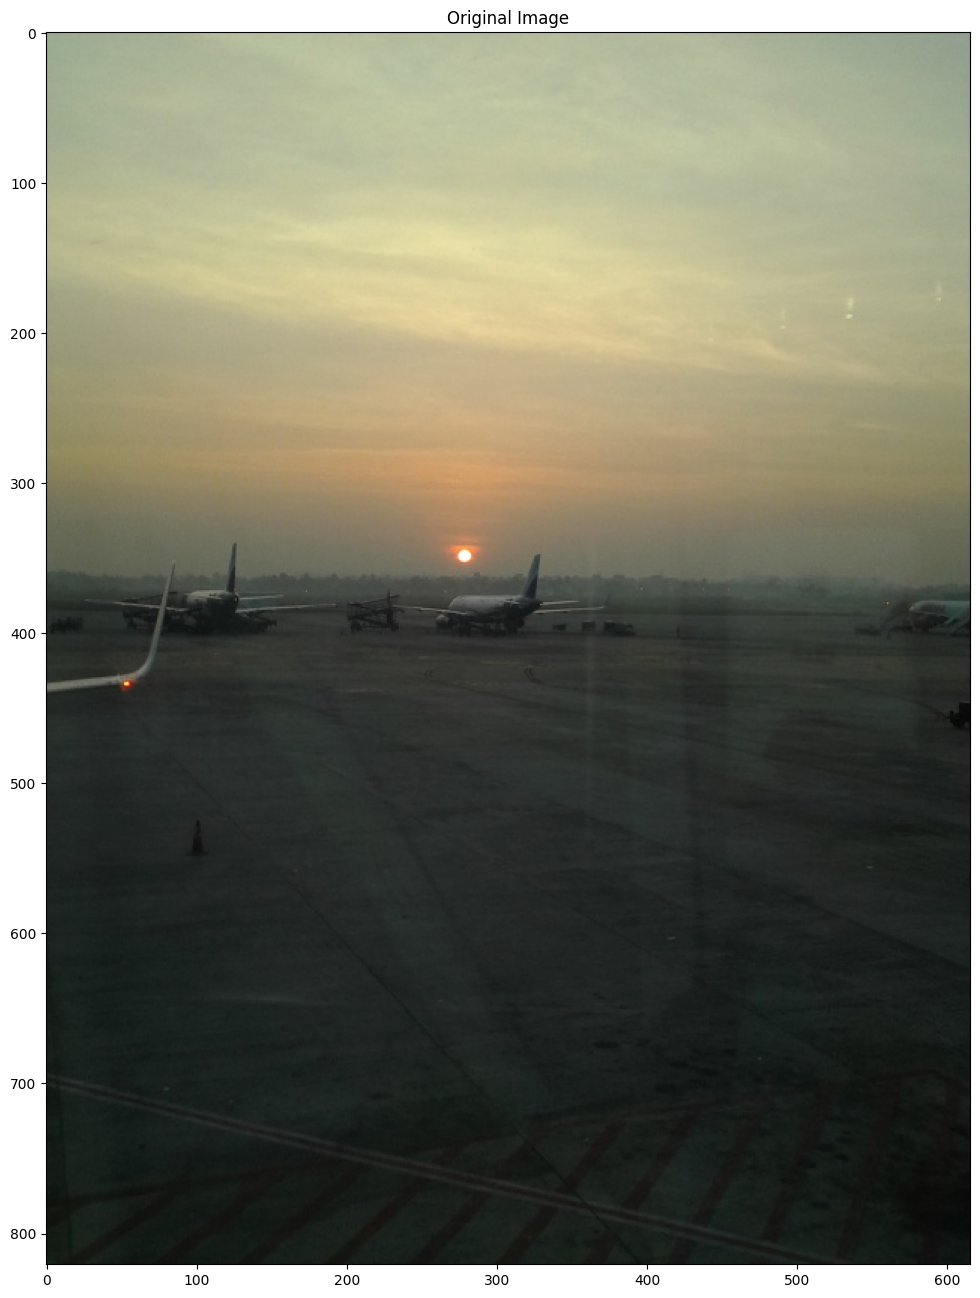

(<matplotlib.image.AxesImage at 0x2bbb45fe9f0>, None)

In [3]:
from skimage import data, draw
from skimage import transform, util
import numpy as np
from skimage import filters, color
from skimage.io import imread, imsave
from matplotlib import pyplot as pylab

image = imread('D:/ĐH/Xử lý ảnh/BTL/images/aero.jpg')

print(image.shape)
# (821, 616, 3)
image = util.img_as_float(image)
energy_image = filters.sobel(color.rgb2gray(image))
pylab.figure(figsize=(20,16)), pylab.title('Original Image'),
pylab.imshow(image), pylab.show()

(821, 416, 3)


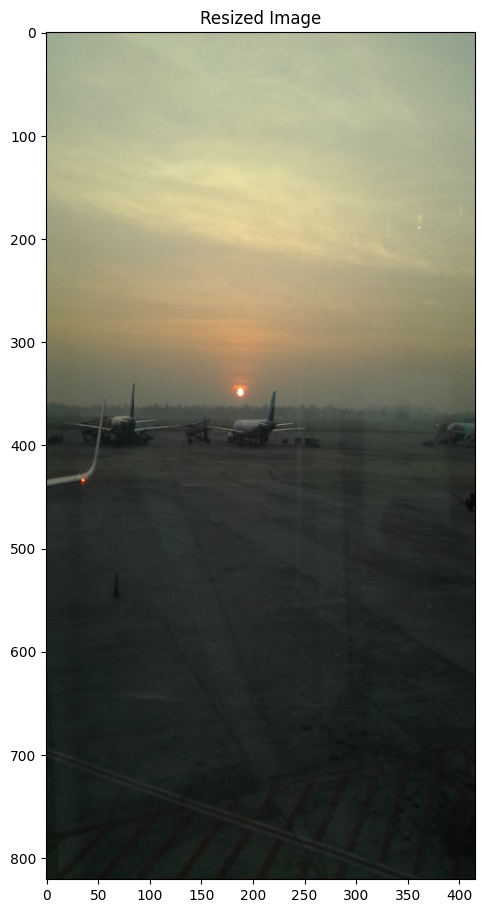

(<matplotlib.image.AxesImage at 0x22f17c92f30>, None)

In [3]:
resized = transform.resize(image, (image.shape[0], image.shape[1] - 200),
mode='reflect')
print(resized.shape)
# (821, 416, 3)
pylab.figure(figsize=(20,11)), pylab.title('Resized Image'),
pylab.imshow(resized), pylab.show()

(720, 534, 3)


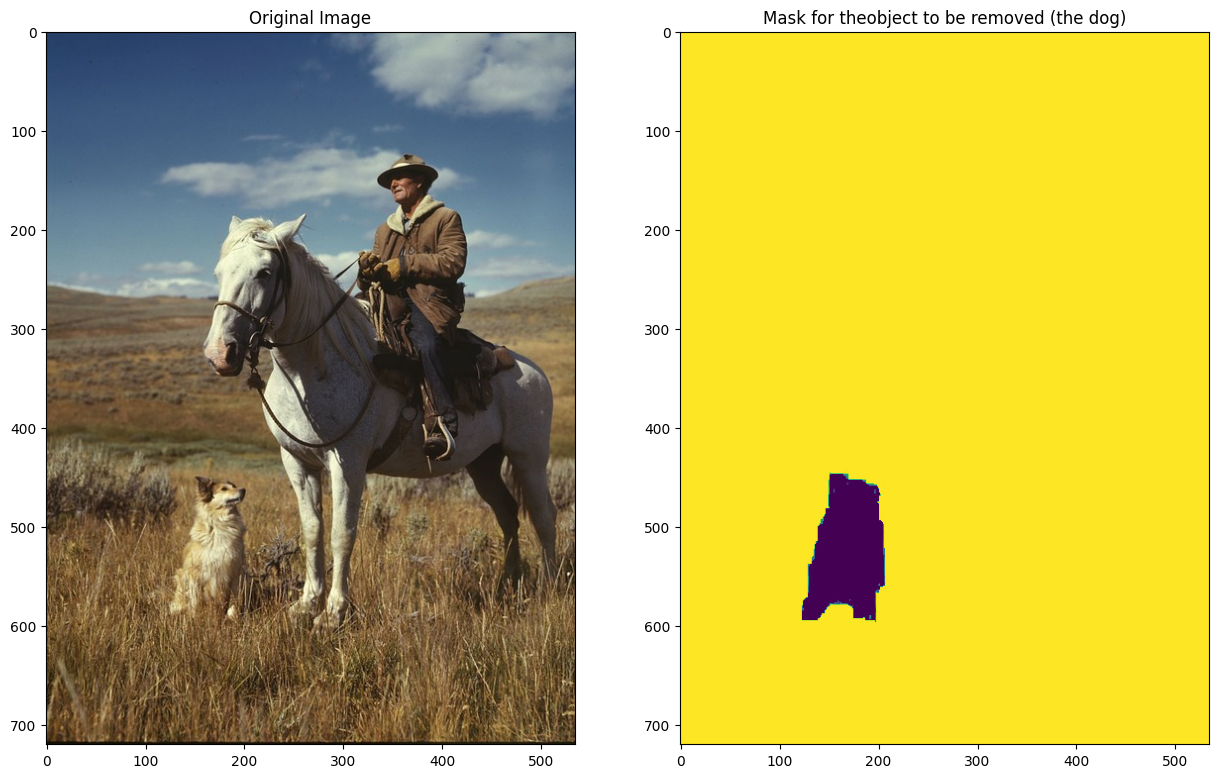

In [5]:
from skimage.color import rgb2gray

image = imread('D:/ĐH/Xử lý ảnh/BTL/images/man.jpg')
mask_img = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/man_mask.jpg'))
print(image.shape)
pylab.figure(figsize=(15,10))
pylab.subplot(121), pylab.imshow(image), pylab.title('Original Image')
pylab.subplot(122), pylab.imshow(mask_img), pylab.title('Mask for theobject to be removed (the dog)') 
pylab.show()

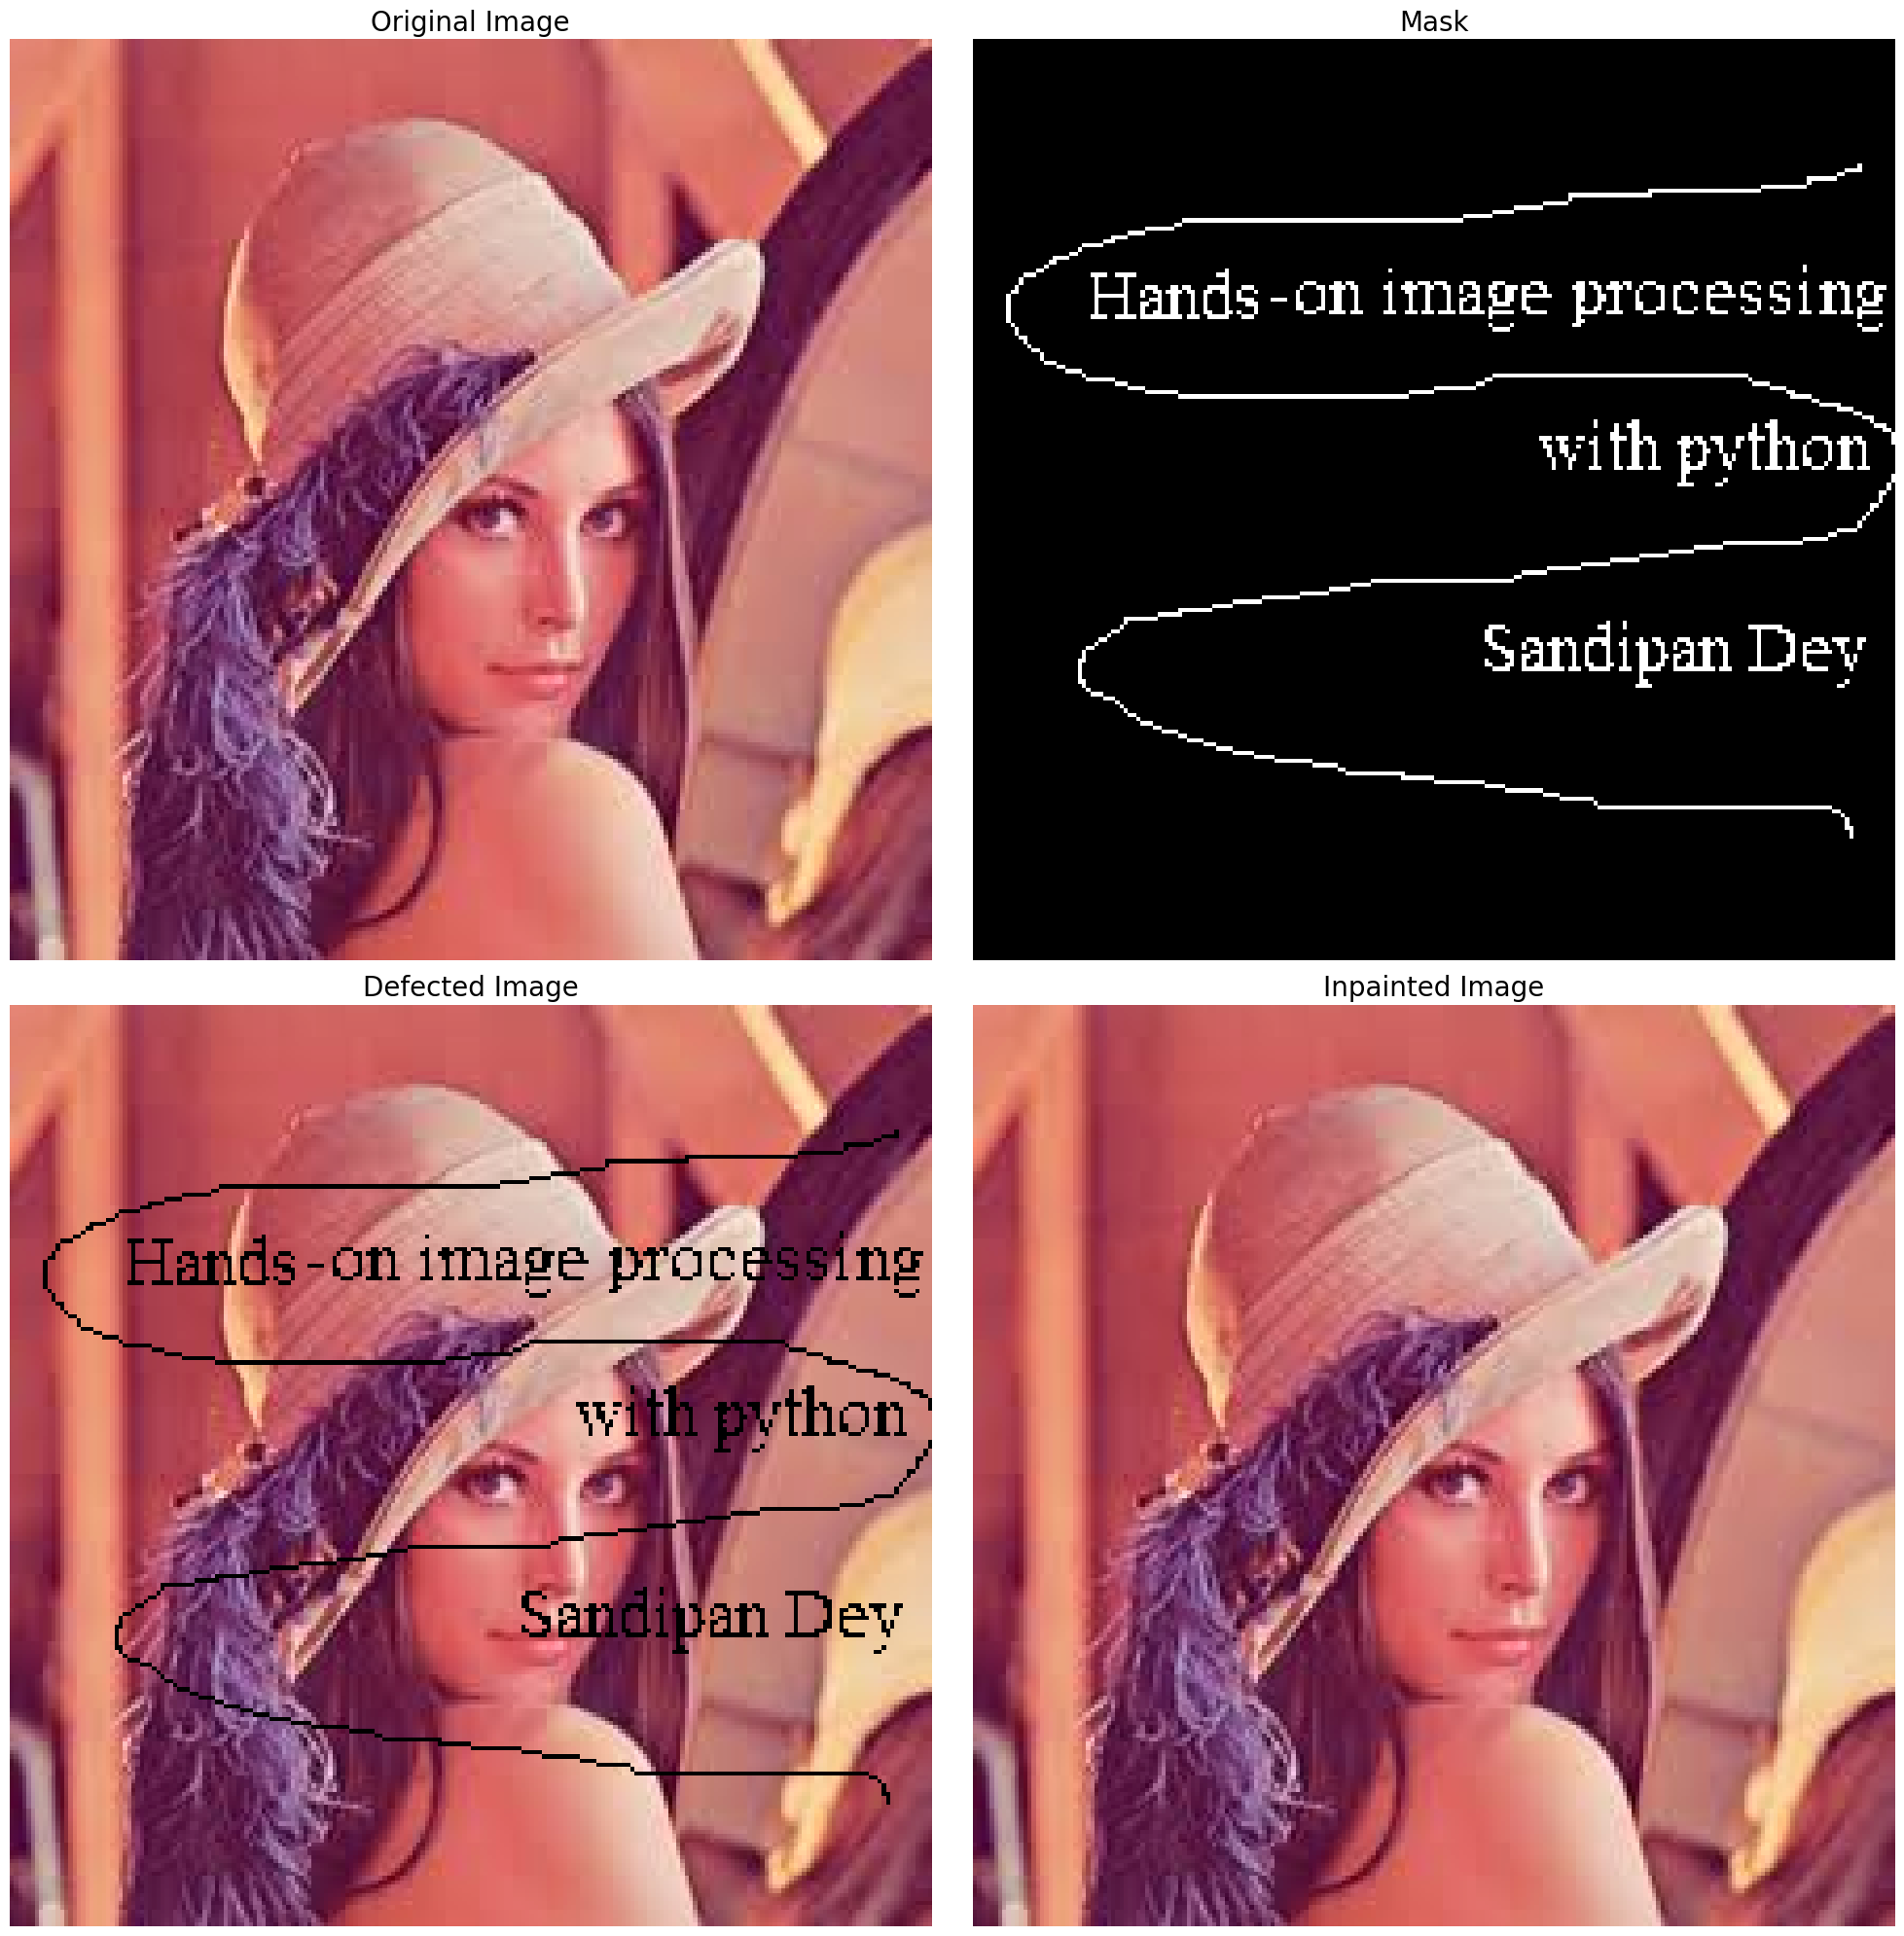

In [16]:
import numpy as np
import matplotlib.pyplot as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import img_as_float
from skimage.restoration import inpaint

# Load the image and mask
image_orig = img_as_float(imread('D:/ĐH/Xử lý ảnh/BTL/images/lena.jpg'))
mask = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/lena_scratch_mask.jpg'))

# Ensure the mask is binary and 2D
mask = (mask > 0.5).astype(np.uint8)

# Ensure dimensions match
if image_orig.shape[:2] != mask.shape:
    raise ValueError("Image and mask dimensions do not match.")

# Create a defective image using the mask
image_defect = image_orig.copy()
image_defect[mask == 1] = 0  # Apply the mask to all color channels

# Perform inpainting on each color channel separately
image_result = np.zeros_like(image_orig)
for channel in range(image_orig.shape[2]):
    image_result[:, :, channel] = inpaint.inpaint_biharmonic(image_defect[:, :, channel], mask)

# Plot the images
fig, axes = pylab.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax = axes.ravel()
ax[0].set_title('Original Image', size=20), ax[0].imshow(image_orig)
ax[1].set_title('Mask', size=20), ax[1].imshow(mask, cmap='gray')
ax[2].set_title('Defected Image', size=20), ax[2].imshow(image_defect)
ax[3].set_title('Inpainted Image', size=20), ax[3].imshow(image_result)

for a in ax:
    a.axis('off')
fig.tight_layout()
pylab.show()


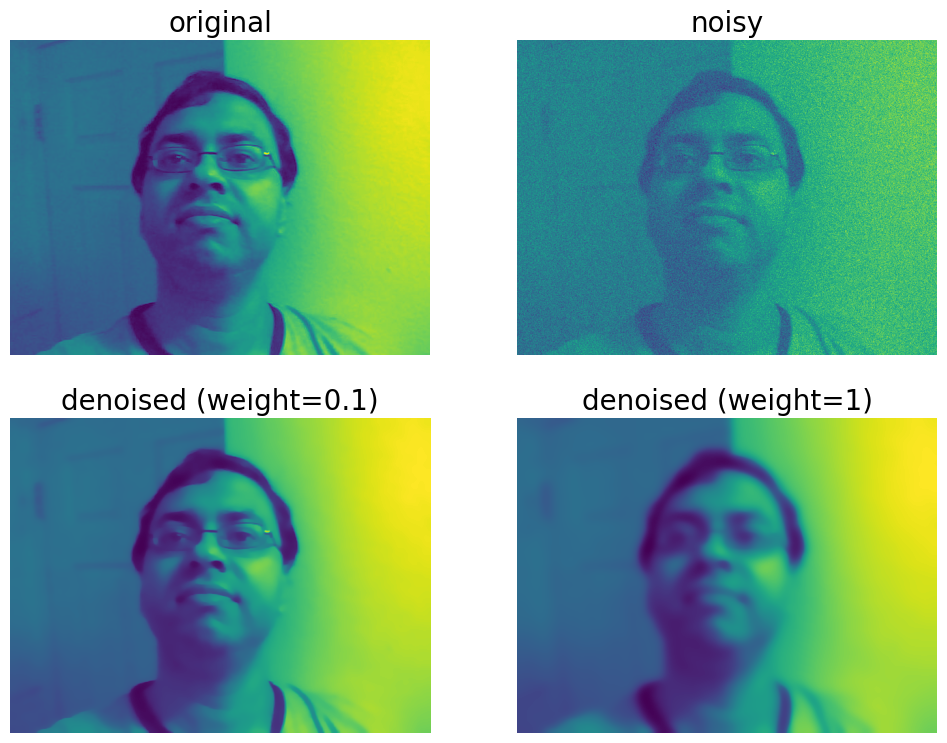

In [18]:
from skimage import io, color, data, img_as_float
from skimage.restoration import denoise_tv_chambolle

image = color.rgb2gray(io.imread('D:/ĐH/Xử lý ảnh/BTL/images/me12.jpg'))
pylab.figure(figsize=(12,9))
noisy_img = image + 0.5 * image.std() * np.random.randn(*image.shape)
pylab.subplot(221), pylab.imshow(image), pylab.axis('off'),
pylab.title('original', size=20)
pylab.subplot(222), pylab.imshow(noisy_img), pylab.axis('off'),
pylab.title('noisy', size=20)
denoised_img = denoise_tv_chambolle(image, weight=0.1)
pylab.subplot(223), pylab.imshow(denoised_img), pylab.axis('off'),
pylab.title('denoised (weight=0.1)', size=20)
denoised_img = denoise_tv_chambolle(image, weight=1) #, multichannel=True)
pylab.subplot(224), pylab.imshow(denoised_img), pylab.axis('off'),
pylab.title('denoised (weight=1)', size=20)
pylab.show()

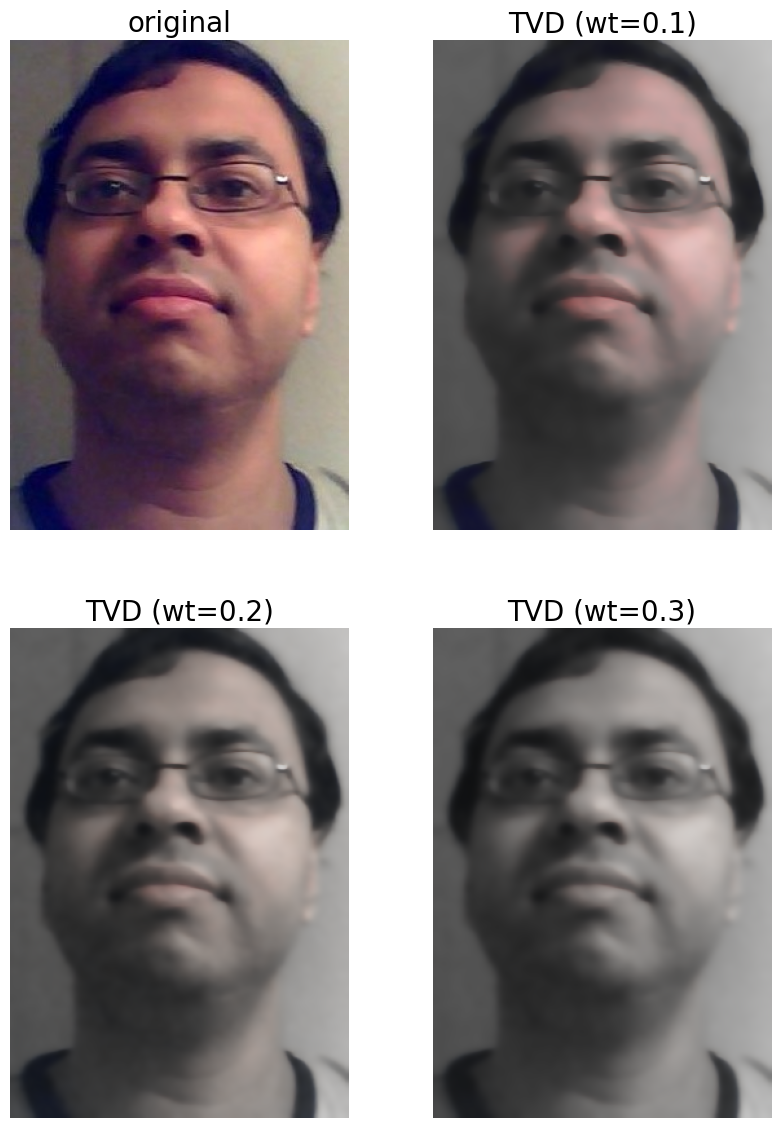

In [21]:
image = io.imread('D:/ĐH/Xử lý ảnh/BTL/images/me18.jpg')
pylab.figure(figsize=(10,14))
pylab.subplot(221), pylab.imshow(image), pylab.axis('off'),
pylab.title('original', size=20)
denoised_img = denoise_tv_chambolle(image, weight=0.1)
pylab.subplot(222), pylab.imshow(denoised_img), pylab.axis('off'),
pylab.title('TVD (wt=0.1)', size=20)
denoised_img = denoise_tv_chambolle(image, weight=0.2)
pylab.subplot(223), pylab.imshow(denoised_img), pylab.axis('off'),
pylab.title('TVD (wt=0.2)', size=20)
denoised_img = denoise_tv_chambolle(image, weight=0.3)
pylab.subplot(224), pylab.imshow(denoised_img), pylab.axis('off'),
pylab.title('TVD (wt=0.3)', size=20)
pylab.show()